# 线性回归练习题

在这个练习中，我们使用一个Kaggle竞赛中提供的共享单车的数据集：[Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/data)。
该数据集包含2011到2012年Capital Bikeshare系统中记录的每日每小时单车的租赁数，以及相应的季节和气候等信息。

数据列：
* **datetime** - hourly date + timestamp  
* **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* **holiday** - whether the day is considered a holiday
* **workingday** - whether the day is neither a weekend nor holiday
* **weather** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy；2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist；3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds；4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* **temp** - temperature in Celsius
* **atemp** - "feels like" temperature in Celsius
* **humidity** - relative humidity
* **windspeed** - wind speed
* **casual** - number of non-registered user rentals initiated
* **registered** - number of registered user rentals initiated
* **count** - number of total rentals

## 第一步：读入数据

In [1]:
# read the data and set the datetime as the index
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)

In [2]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 第二步：可视化数据

* 用matplotlib画出温度“temp”和自行车租赁数“count”之间的散点图；
* 用seborn画出温度“temp”和自行车租赁数“count”之间带线性关系的散点图（提示：使用seaborn中的lmplot绘制）

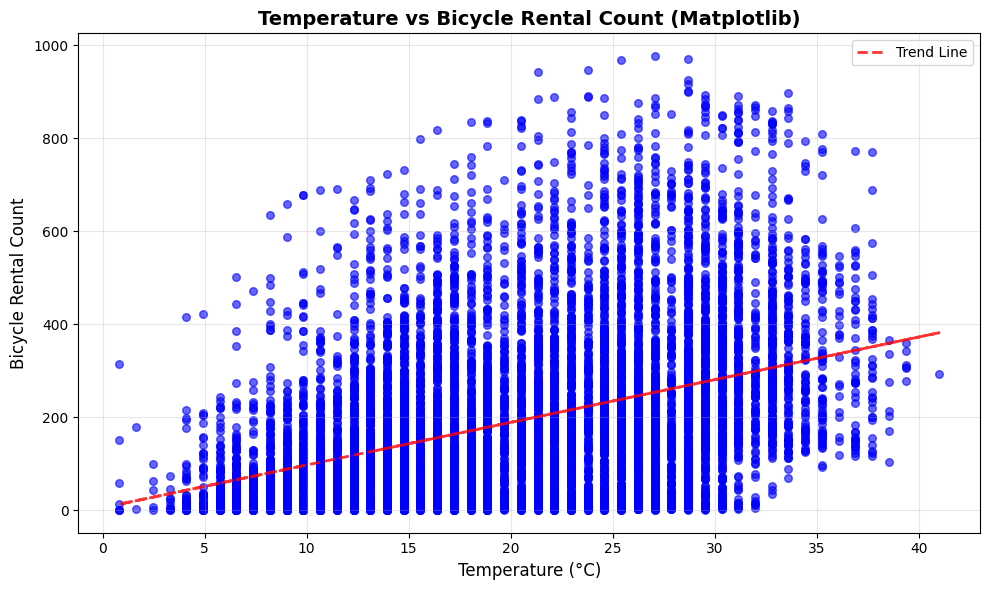

In [3]:
# matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(bikes['temp'], bikes['count'], alpha=0.6, color='blue', s=30)
plt.title('Temperature vs Bicycle Rental Count (Matplotlib)', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Bicycle Rental Count', fontsize=12)
plt.grid(True, alpha=0.3)

# 添加趋势线
z = np.polyfit(bikes['temp'], bikes['count'], 1)
p = np.poly1d(z)
plt.plot(bikes['temp'], p(bikes['temp']), "r--", alpha=0.8, linewidth=2, label='Trend Line')
plt.legend()

plt.tight_layout()
plt.show()


=== 使用Seaborn绘制带线性回归的散点图 ===


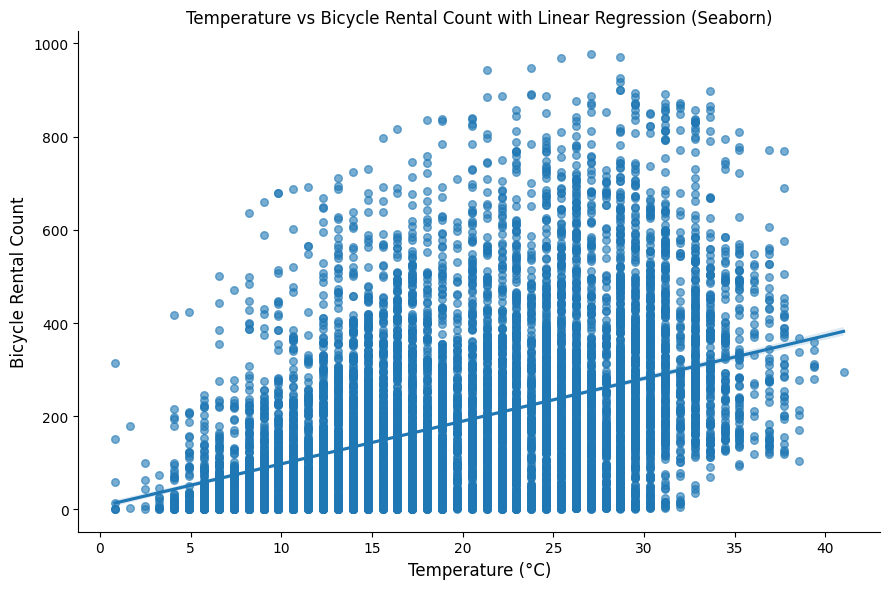

✅ Seaborn带线性关系的散点图绘制完成!


In [4]:
# seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# 方法1: 直接使用lmplot（推荐）
print("=== 使用Seaborn绘制带线性回归的散点图 ===")
sns.lmplot(data=bikes, x='temp', y='count', height=6, aspect=1.5, 
           scatter_kws={'alpha':0.6, 's':30})
plt.title('Temperature vs Bicycle Rental Count with Linear Regression (Seaborn)', fontsize=12)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Bicycle Rental Count', fontsize=12)
plt.tight_layout()
plt.show()

print("✅ Seaborn带线性关系的散点图绘制完成!")


## 第三步：一元线性回归

用温度预测自行车租赁数

In [5]:
# create X and y
X = bikes[['temp']]  # 特征：温度
y = bikes['count']   # 目标：自行车租赁数

print("=== 特征和目标变量 ===")
print(f"X (特征 - 温度) 形状: {X.shape}")
print(f"y (目标 - 租赁数) 形状: {y.shape}")
print(f"\n温度统计:")
print(X.describe())
print(f"\n租赁数统计:")
print(y.describe())


=== 特征和目标变量 ===
X (特征 - 温度) 形状: (10886, 1)
y (目标 - 租赁数) 形状: (10886,)

温度统计:
              temp
count  10886.00000
mean      20.23086
std        7.79159
min        0.82000
25%       13.94000
50%       20.50000
75%       26.24000
max       41.00000

租赁数统计:
count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


In [6]:
# import, instantiate, fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=== 数据分割完成 ===")
print(f"训练集大小: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"测试集大小: X_test {X_test.shape}, y_test {y_test.shape}")


from sklearn.linear_model import LinearRegression
print("=== 实例化线性回归模型 ===")
model = LinearRegression()
print("✅ 模型实例化完成!")
print(f"模型类型: {type(model)}")
print(f"模型参数: {model.get_params()}")
# 4. 拟合模型 (Fit)
print("=== 拟合模型 ===")
model.fit(X_train, y_train)
print("✅ 模型拟合完成!")

# 显示拟合结果
print(f"系数 (斜率): {model.coef_[0]:.4f}")
print(f"截距: {model.intercept_:.4f}")
print(f"回归方程: 租赁数 = {model.coef_[0]:.4f} × 温度 + {model.intercept_:.4f}")
# 5. 模型预测和评估
print("=== 模型预测和评估 ===")
# 预测
y_pred = model.predict(X_test)

# 评估指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方误差 (MSE): {mse:.2f}")
print(f"R² 分数: {r2:.4f}")
print(f"模型解释了 {r2 * 100:.1f}% 的方差")


=== 数据分割完成 ===
训练集大小: X_train (8708, 1), y_train (8708,)
测试集大小: X_test (2178, 1), y_test (2178,)
=== 实例化线性回归模型 ===
✅ 模型实例化完成!
模型类型: <class 'sklearn.linear_model._base.LinearRegression'>
模型参数: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}
=== 拟合模型 ===
✅ 模型拟合完成!
系数 (斜率): 9.0645
截距: 7.8550
回归方程: 租赁数 = 9.0645 × 温度 + 7.8550
=== 模型预测和评估 ===
均方误差 (MSE): 27419.99
R² 分数: 0.1693
模型解释了 16.9% 的方差


In [7]:
# print the coefficients
print("=== 线性回归模型系数 ===")
print(f"系数 (斜率): {model.coef_[0]:.6f}")
print(f"截距: {model.intercept_:.6f}")
print(f"回归方程: y = {model.coef_[0]:.6f} * temp + {model.intercept_:.6f}")


=== 线性回归模型系数 ===
系数 (斜率): 9.064522
截距: 7.855005
回归方程: y = 9.064522 * temp + 7.855005


## 第四步：探索多个特征

In [8]:
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

数据列名:
['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

数据形状: (10886, 11)

可用的特征列: ['temp', 'season', 'weather', 'humidity']
=== 方法1: 使用pairplot查看所有特征关系 ===


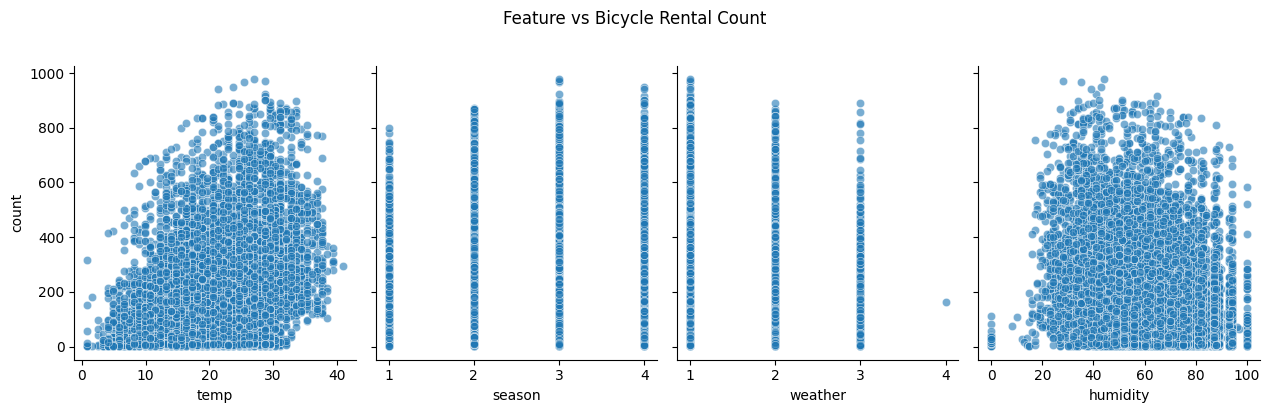

In [9]:
# using seaborn, draw multiple scatter plots between each feature in feature_cols and 'count'
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 定义特征列
feature_cols = ['temp', 'season', 'weather', 'humidity']

# 首先查看数据的所有列，确定特征列
print("数据列名:")
print(bikes.columns.tolist())
print(f"\n数据形状: {bikes.shape}")

# 检查哪些特征列实际存在于数据中
available_features = [col for col in feature_cols if col in bikes.columns]
print(f"\n可用的特征列: {available_features}")
print("=== 方法1: 使用pairplot查看所有特征关系 ===")
sns.pairplot(bikes[available_features + ['count']], 
             x_vars=available_features, 
             y_vars=['count'],
             height=4, 
             aspect=0.8,
             plot_kws={'alpha':0.6})
plt.suptitle('Feature vs Bicycle Rental Count', y=1.02)
plt.tight_layout()
plt.show()


In [10]:
# correlation matrix (ranges from 1 to -1)
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<Axes: >

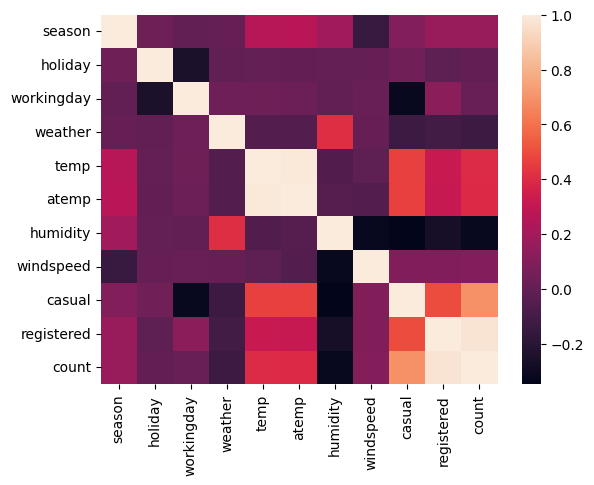

In [11]:
sns.heatmap(bikes.corr())

### 用'temp', 'season', 'weather', 'humidity'四个特征预测单车租赁数'count'

In [12]:
# create X and y
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 创建X和y
feature_cols = ['temp', 'season', 'weather', 'humidity']
X = bikes[feature_cols]  # 特征：四个变量
y = bikes['count']       # 目标：自行车租赁数

print("=== 特征和目标变量 ===")
print(f"X (特征) 形状: {X.shape}")
print(f"y (目标) 形状: {y.shape}")
print(f"\n使用的特征: {feature_cols}")


=== 特征和目标变量 ===
X (特征) 形状: (10886, 4)
y (目标) 形状: (10886,)

使用的特征: ['temp', 'season', 'weather', 'humidity']


In [13]:
# import, instantiate, fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=== 数据准备完成 ===")
print(f"X_train形状: {X_train.shape}")
print(f"y_train形状: {y_train.shape}")
print(f"X_test形状: {X_test.shape}")
print(f"y_test形状: {y_test.shape}")
print(f"使用的特征: {feature_cols}")
print("=== 导入线性回归模型 ===")
from sklearn.linear_model import LinearRegression
print("✅ LinearRegression导入成功!")
print("=== 实例化线性回归模型 ===")
model = LinearRegression()
print("✅ 模型实例化完成!")
print(f"模型类型: {type(model)}")
print(f"模型参数: {model.get_params()}")
print("=== 拟合模型 ===")
model.fit(X_train, y_train)
print("✅ 模型拟合完成!")

=== 数据准备完成 ===
X_train形状: (8708, 4)
y_train形状: (8708,)
X_test形状: (2178, 4)
y_test形状: (2178,)
使用的特征: ['temp', 'season', 'weather', 'humidity']
=== 导入线性回归模型 ===
✅ LinearRegression导入成功!
=== 实例化线性回归模型 ===
✅ 模型实例化完成!
模型类型: <class 'sklearn.linear_model._base.LinearRegression'>
模型参数: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}
=== 拟合模型 ===
✅ 模型拟合完成!


In [14]:
# print the coefficients
print("=== 多元线性回归模型系数 ===")
print(f"系数 (coefficients): {model.coef_}")
print(f"截距 (intercept): {model.intercept_:.6f}")
# 详细显示每个特征的系数
print("\n=== 详细系数信息 ===")
print("特征系数表:")
for i, feature in enumerate(feature_cols):
    print(f"{feature:10}: {model.coef_[i]:.6f}")
print(f"{'截距':10}: {model.intercept_:.6f}")
# 显示回归方程
print("\n=== 多元线性回归方程 ===")
equation = f"count = {model.intercept_:.6f}"
for i, feature in enumerate(feature_cols):
    sign = " + " if model.coef_[i] >= 0 else " - "
    equation += f"{sign}{abs(model.coef_[i]):.6f}×{feature}"
print(f"回归方程: {equation}")


=== 多元线性回归模型系数 ===
系数 (coefficients): [ 7.72959639 22.63527265  5.99772278 -3.09963226]
截距 (intercept): 161.245909

=== 详细系数信息 ===
特征系数表:
temp      : 7.729596
season    : 22.635273
weather   : 5.997723
humidity  : -3.099632
截距        : 161.245909

=== 多元线性回归方程 ===
回归方程: count = 161.245909 + 7.729596×temp + 22.635273×season + 5.997723×weather - 3.099632×humidity


### 使用train/test split和RMSE来比较多个不同的模型

In [15]:
# compare different sets of features
feature_cols1 = ['temp', 'season', 'weather', 'humidity']
feature_cols2 = ['temp', 'season', 'weather']
feature_cols3 = ['temp', 'season', 'humidity']


## 补充：处理类别特征

有两种类别特征：

- **有序类别值：** 转换成相应的数字值(例如: small=1, medium=2, large=3)
- **无序类别值:** 使用dummy encoding (0/1编码)

此数据集中的类别特征有：

- **有序类别值：** weather (已经被编码成相应的数字值1,2,3,4)
- **无序类别值：** season (需要进行dummy encoding), holiday (已经被dummy encoded), workingday (已经被dummy encoded)

In [16]:
# create dummy variables
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,False,False,True,False
2012-03-18 04:00:00,True,False,False,False
2012-10-14 17:00:00,False,False,False,True
2011-04-04 15:00:00,False,True,False,False
2012-12-11 02:00:00,False,False,False,True


我们只需要 **三个 dummy 变量 (不是四个)** （为什么？）, 所以可以删除第一个dummy变量。

In [17]:
# drop the first column
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,False,True,False
2012-03-18 04:00:00,False,False,False
2012-10-14 17:00:00,False,False,True
2011-04-04 15:00:00,True,False,False
2012-12-11 02:00:00,False,False,True


In [18]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
bikes = pd.concat([bikes, season_dummies], axis=1)

# print 5 random rows
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,False,True,False
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,False,False,False
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,False,False,True
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,True,False,False
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,False,False,True


### 将编码成的dummy变量加入回归模型的特征，预测单车租赁数

In [22]:
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
# 设置图形样式
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# 检查数据基本情况
print("=== 数据基本信息 ===")
print(f"数据形状: {bikes.shape}")
print(f"\n数据列名: {bikes.columns.tolist()}")
print(f"\n数据前5行:")
print(bikes[['temp', 'season', 'humidity', 'season_2', 'season_3', 'season_4']].head())

# 定义特征列（包含季节虚拟变量）
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']

# 检查目标变量列名（假设是'count'，如果不是请调整）
target_col = 'count'
if target_col not in bikes.columns:
    # 尝试常见的单车租赁数列名
    possible_targets = ['count', 'total', 'rentals', 'cnt', 'demand']
    target_col = next((col for col in possible_targets if col in bikes.columns), None)
    if target_col is None:
        print("请指定目标变量列名")
        print(f"可用列: {bikes.columns.tolist()}")
        # 这里需要您指定目标变量列名
        target_col = 'your_target_column_name'  # 请修改为实际列名

print(f"\n目标变量: {target_col}")

# 检查特征列是否存在
missing_cols = [col for col in feature_cols if col not in bikes.columns]
if missing_cols:
    print(f"错误: 缺少特征列: {missing_cols}")
    print(f"可用列: {bikes.columns.tolist()}")
else:
    # 准备特征和目标变量
    X = bikes[feature_cols]
    y = bikes[target_col]
    
    print(f"\n=== 数据准备完成 ===")
    print(f"特征矩阵形状: {X.shape}")
    print(f"目标变量统计:")
    print(f"最小值: {y.min():.2f}")
    print(f"最大值: {y.max():.2f}")
    print(f"均值: {y.mean():.2f}")
    print(f"标准差: {y.std():.2f}")
    
    # 检查特征的基本统计信息
    print(f"\n=== 特征统计信息 ===")
    print(X.describe())
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"\n=== 数据划分 ===")
    print(f"训练集大小: {X_train.shape}")
    print(f"测试集大小: {X_test.shape}")
    
    # 创建和训练线性回归模型
    print("\n=== 训练线性回归模型 ===")
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    print("✅ 模型训练完成!")
    
    # 进行预测
    y_pred = lr_model.predict(X_test)

=== 数据基本信息 ===
数据形状: (10886, 14)

数据列名: ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'season_2', 'season_3', 'season_4']

数据前5行:
                     temp  season  humidity  season_2  season_3  season_4
datetime                                                                 
2011-01-01 00:00:00  9.84       1        81     False     False     False
2011-01-01 01:00:00  9.02       1        80     False     False     False
2011-01-01 02:00:00  9.02       1        80     False     False     False
2011-01-01 03:00:00  9.84       1        75     False     False     False
2011-01-01 04:00:00  9.84       1        75     False     False     False

目标变量: count

=== 数据准备完成 ===
特征矩阵形状: (10886, 5)
目标变量统计:
最小值: 1.00
最大值: 977.00
均值: 191.57
标准差: 181.14

=== 特征统计信息 ===
              temp      humidity
count  10886.00000  10886.000000
mean      20.23086     61.886460
std        7.79159     19.245033
min        0.82000      0.0

和前面的模型进行比较